In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



![](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

<h2 align='center'>Data Literacy in the Classroom</h2>

<h4 align='center'>Laura Gutierrez Funderburk (Cybera) </h4>

<h4 align='center'>Michael Lamoureux (U. Calgary) </h4>


![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)

## What will we cover in this workshop:

- Introductions

- Data literacy: an example using global warming data

- Jupyter Notebooks and the Callysto project

- Hands on activities: the Unfair Dice problem

- Computational thinking exercise 

- Final remarks

- Additional resources for your lesson plan

## What is data literacy?

- Using data to inform decisions

- Reading, working with, analyzing, and arguing with data

- How to find good data, how to extract useful information from data

# Jupyter notebooks

This slideshow is actually a Jupyter notebook.

A web browser-based document, combining text, computer code, and graphics.

It is live, you can edit and use it as you present your stuff.


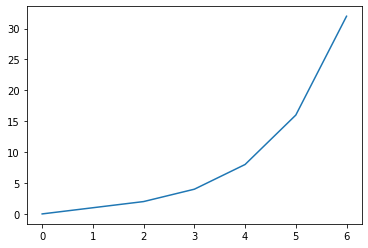

In [12]:
# This is live code. You can change it!
import matplotlib.pyplot as plt

plt.plot([0,1,2,4,8,16,32]);

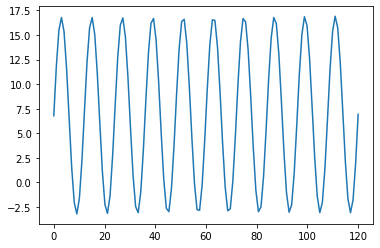

In [3]:
# A simulation of temperatures
import numpy as np
x = np.linspace(0,12*10,num=12*10)
y = 0.00123*x+6.778 + 10*np.sin(2*np.pi*x/12)
plt.plot(x,y);

# Callysto project

Partnership of **Cybera Inc** (Alta) and the **Pacific Institute for the Mathematical Sciences**

Funded by **CanCode** (Canadian Gov't)

Resources for teachers, students to learn coding, data science, computational thinking.

Web: callysto.ca



## Sample notebooks at Callysto
<img src="images/CallystoPage.png" alt="Drawing" style="width: 768px;"/>

<h1 align='center'>Social Justice and Computational Thinking</h1>

<h4 align='center'>Laura Gutierrez Funderburk (SFU)</h4>

<h4 align='center'>Richard Hoshino, (Quest)</h4>

<h4 align='center'>Michael Lamoureux, (U Calgary) </h4>


<h2 align='center'>Motivation</h2>

How do small advantages, repeated over time, contribute to the success of an individual?

Does this make a difference in what we see as fairness, or justice, in real life?

Can we make a simulation of this, and explore any remediations?

<h2 align='center'>Example: Socio-economic status</h2>

Suppose Alice and Bob are both going to the same university.

Alice has money, lives close to campus, has a car, doesn't need a job for support.

Bob has no money, lives far from campus, takes transit, has a part-time job for tuition.

Does Alice end up more successful than Bob?

<h2 align='center'>Motivation</h2>

How do relatively small advantages play a role with respect to the success of individuals over time? How can we create a scenario involving two or more individuals, each with differing degrees of advantage, and observe how slight advantages (or disadvantages) affect their trajectories over time? 

We will explore the concept of fairness as well as the concepts of expected and experimental probability via a probability game between two players in which one player possesses a fixed slight advantage over the other. We will solve the “Unfair Dice Problem” via an exploratory approach, and using Jupyter notebooks and the Python programming language, we will develop an interactive application that allows us to simulate how each player fares over time.  This work is part of the Callysto Project, a federally-funded program to bring computational thinking and mathematical problem-solving skills into Grade 5-12 classrooms.

The Unfair Dice Problem has relevance and application in multiple areas of life, including but not limited to the role small advantages play in the context of employment, housing, access to education and support, mortgages and loan pre-approval, and social advancement and recognition. Although our application is based on a game involving dice, it is an illustration of the effect that seemingly small advantages can play over a long period of time in the outcome that individuals experience. 

<h2 align='center'>Real Life Application Example</h2>

One example is the role socio-economic status play in academic success. Let's take the case of two students going into university. Student A owns a car, lives near school and does not need to take out student loans. Student B on the other hand, has taken out a loan to pay for classes, works part time to decrease the amount of money they need to borrow, and rents a room that is far from school but cheap, they use public transit every day. 

Over time, Student A experiences less stress and is able to devote more time to studying which results in higher marks, being able to access higher-level classes and graduate school. Because student A is a top performer, it is easy for them to get internships and valuable work experience and as a result, Student A has higher probability of getting a high-pay job. 

Student B on the other hand is constantly stressed over debt, cannot spend as much time on studying as they work part time and as a result does not excel in school. This decreases their opportunities to be accepted into higher-level education and graduate school, as well as getting an intership - both of which would support student B in getting a high-paying job.

Through computational thinking we can model problems like the above to simulate people's outcome overtime. We can use this information to modify the conditions of the model to balance unfairness - for instance by providing scholarships based on need, by modifying entry-level requirements to include work experience in addition to grades, and to support creating affordable living options for students. Another solution might be running a survey of socio-economic status and available resources, and adjust tuition accordingly, instead of charging everyone the same amount. 

<h2 align='center'>Let's replace with a game of dice.</h2>

<img align='center' src="./images/twodice6401.jpg" alt="Drawing" style="width: 450px;"/>

Alice and Bob each roll a die. The one with a bigger number wins. Ties go to Alice. 

Starting with ten dollars each, at each roll the winner takes a dollar from the loser. 

Let's play. Play until someone runs out of money. 

<h2 align='center'>Setting up the game</h2>

We will use two dice in this game, and assume the dice are fair, i.e. there is the same probability of getting one of the six faces. 

Let's suppose two people, Alice and Bob, decide to play with this setup and start with the same amount of money, $10 each. 

One die will be designated as "Alice's die" while the other one will be designated as "Bob's die". Dice are rolled and the outcome obtained from Bob's outcome is subtracted from the Alice's outcome. 

<img src="./images/twodice6401.jpg" alt="Drawing" style="width: 450px;"/>

If Alice's outcome is greater than or equal to Bob's, Alice takes $\$1$ from Bob. Otherwise, Bob takes $\$1$ from Alice. 

<h2 align='center'>In class: Let's Play</h2>

Break up the students into groups of two (Alice and Bob).

Give each student ten candies, and a die. Have them roll the dice, and trade candy until someone runs out.

Count up how many Alices won all the candy? How many Bobs won them all?

Is this fair?

<h2 align='center'>In an online class: Let's Play</h2>

Using Jupyter notebooks to have students play online. 

- We will use this link https://tinyurl.com/virtual-dice (also posted in the comments)

- People will be broken into groups using Zoom breakout rooms

- Within each group, members decide who shares their screen and run the notebook

- Use the notebook to simulate Bob and Alice playing the game

- Run through the notebook within your group

<h2 align='center'>Let's Play</h2>

Forming groups of two's, decide which of you plays "Alice" and "Bob". 

Each player will be given 10 toothpicks - each representing $\$1$ dollar. 

Roll the two dice. If Alice's outcome is greater than or equal to Bob's outcome, player Alice gets one toothpick from Bob. Otherwise player Bob gets 1 toothpick from Alice. 

Roll 10 times and note how the number of toothpicks changes for each player. 

Who has more toothpicks at the end of 10 rolls? 

<h3>Let's Try Again....</h3>

Let's repeat this game, but this time, if Bob's outcome is less than Alice's outcome, Bob gets <strong>2</strong> toothpicks instead of one. 

Who has more toothpicks at the end of 10 rolls? 

<h2 align='center'>What makes this game unfair?</h2>

Below is the sample space of our game. Bob's die outcome (black column) is subtracted from Alice's die outcome (dark red row). 

Alice wins whenever the result is 0 or more. Bob wins whenever the result is negative. 

The probability Alice will win is $$P(A) = \frac{21}{36}$$

while the probability Bob will win is $$P(B) = \frac{15}{36}$$

In [4]:
%%html
<table style='margin: 0 auto;font-size: 25px'>
    <tr style="width:100%;text-align:center;background-color:#990000;color:white">
    <th style="background-color:white;color:white"> </th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
        <th>5</th>
        <th>6</th>
    </tr>
    <tr>
        
        <td style="background-color:black;color:white"><strong>1</strong></td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
        <td style="background-color:#ffcccc">4</td>
        <td style="background-color:#ffcccc">5</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>2</strong></td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
        <td style="background-color:#ffcccc">4</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>3</strong></td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>4</strong></td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>5</strong></td>
        <td>-4</td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>6</strong></td>
        <td>-5</td>
        <td>-4</td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
    </tr>
</table>

,1,2,3,4,5,6
1,0,1,2,3,4,5
2,-1,0,1,2,3,4
3,-2,-1,0,1,2,3
4,-3,-2,-1,0,1,2
5,-4,-3,-2,-1,0,1
6,-5,-4,-3,-2,-1,0


In the first game, the expected per-round payoff for Alice is $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-1) = \frac{1}{6}.$$  

So after about 60 rounds of play, Alice would be "expected" to have all of the toothpicks.  


Conversely, in the second game, the expected per-round payoff for Alice is  $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-2) = \frac{-1}{4}.$$  


So after about 40 rounds of play, Bob would be "expected" to have all of the toothpicks.

<h2 align='center'>Simulating the Game</h2>

Let's use some code to simulate many trials of this unfair game.

Try making it more fair. Change the starting points, or the payoffs.


In [5]:
import random

import matplotlib.patches as mpatches
from ipywidgets import interact, interact_manual, widgets, Layout, VBox, HBox, Button
from IPython.display import display, Javascript, Markdown, HTML, clear_output
import matplotlib.pyplot as plt



#def runN_cell( b ):    
#    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))    

    
#def rerun_cell( b ):    
#    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+1)'))    


In [6]:
### This cell contains code to simulate our game

def roll_dice():
    
    """This function simulates rolling two dice 
    and substracting the minor die outcome from the major die outcome"""
    major_die = random.choice([1,2,3,4,5,6])
    minor_die = random.choice([1,2,3,4,5,6])
    
    if major_die >= minor_die:
        return True
    else:
        return False

def play_game(StartValue_A, StartValue_B, p, q):
    
    """This function implements two players engaging in the game"""
        
    # Initialize variables
    # Set value A to starting value, resp value C
    value_A = StartValue_A
    value_B = StartValue_B 
    turn_number = 0
    # Store points on each turn
    CurrentValue_A = []
    CurrentValue_B = []
    # Initialize winners
    winner_A = 0
    winner_B = 0
    
    # We want to continue playing as long as both players have at least one more point
    while value_A > 0 and value_B > 0:
        # Increase turn
        turn_number += 1
        
        # If major die >=  minor die 
        if roll_dice():
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            
            # Give A one more (set of) point(s) 
            value_A = value_A + p
            # Remove the same quantity from B 
            value_B = value_B - p
            
        # Otherwise, we have major die < minor die 
        else:
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            # Give B one more (set of) points 
            value_B = value_B + q
            # Remove the same quantity from A
            value_A = value_A - q
            
    # Get winners
    # If A has zero or less points, B is the winner
    if value_A <= 0: winner_B = 1
    # Otherwise, A is the winner 
    if value_B <= 0: winner_A = 1
    
    return [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B]
    
    

def plot_game(StartValue_A, StartValue_B, p, q):
    
    """This function simulates the game for a given 1000 trials and prints 
    the average number of times A and B win"""
    # Suppose we set 1000 trials
    n = 1000
   
    # Initialize variables
    wins_for_A = 0
    wins_for_B = 0
    total_moves = 0   
    
    # Iterate over the total number of trials, and repeat game
    for i in range(n):  
        [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B] = play_game(StartValue_A, StartValue_B, p, q)
        # Add number of turns
        total_moves += turn_number
        # Add total number of times A won
        wins_for_A += winner_A
        # Add total number of times B won  
        wins_for_B += winner_B
    
    print("The average number of rounds is", total_moves/n)
    print("Alice wins", round(100*wins_for_A/n,2), "% of the time")
    print("Bob wins", round(100*wins_for_B/n,2), "% of the time")
    
    # Plot results
    # Set x axis values
    x_co = [i for i in range(len(CurrentValue_A))]
    # Initialize figure and set x, y limits
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_xlim([0,len(x_co) + 1])
    ax.set_ylim([0,StartValue_A+StartValue_B])
    ax.grid(True) 
    # Plot points for A and B at each turn
    ax.plot(x_co,CurrentValue_A,label="Alice",c='r')
    ax.plot(x_co,CurrentValue_B,label="Bob",c='black')
    # Add labels, title and legend to improve readability
    ax.set_ylabel("Number of points",fontsize=25)
    ax.set_xlabel("Number of turns",fontsize=25)
    ax.set_title("A Typical Game",fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
    plt.show()

In [7]:
# Create interactive menu with parameters

style = {'description_width': 'initial'}

all_the_widgets = [widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='Alice: Initial Points:',
            disabled=False,style =style), widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='Bob:Initial Points:',
            disabled=False,style =style), widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points for Alice win',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style),widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points for Bob win',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style)]


# Button widget
CD_button = widgets.Button(
    button_style='success',
    description="Run Simulations", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    

def draw_results(b):
    StartValue_A = all_the_widgets[0].value
    StartValue_B = all_the_widgets[1].value
    p = all_the_widgets[2].value
    q = all_the_widgets[3].value
    clear_output()
    display(tab)  ## Have to redraw the widgets
    plot_game(StartValue_A, StartValue_B, p, q)

# Connect widget to function - run subsequent cells
#CD_button.on_click( runN_cell )
CD_button.on_click( draw_results )

# user menu using categories found above
tab3 = VBox(children=[HBox(children=all_the_widgets[0:2]),HBox(children=all_the_widgets[2:4]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Choose Parameters')
# display(tab)   ## We will display in the next cell. So SlideShow works. 

In [8]:
display(tab)

The average number of rounds is 57.374
Alice wins 96.5 % of the time
Bob wins 3.5 % of the time


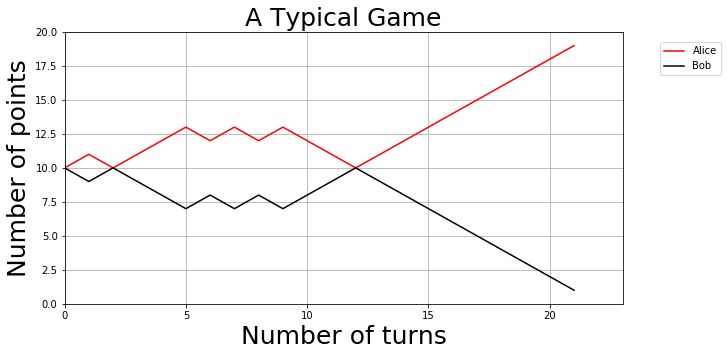

In [9]:
StartValue_A = all_the_widgets[0].value
StartValue_B = all_the_widgets[1].value
p = all_the_widgets[2].value
q = all_the_widgets[3].value
plot_game(StartValue_A, StartValue_B, p, q)

<h2 align='center'>What can we take away from this?</h2>

In this notebook we learned about how slight advantages can significantly change the outcome of two or more people involved and that sometimes this effect is noticeable only after engaging in several iterations. 

If the players are unaware of the situation, the outcome is the party with greater advantage experiences a higher likelihood of "winning" (or experiencing some positive outome), whereas the party with less advantage experiences lower likelihood of "winning" and thus has a higher probability of experiencing loss. 

There are significant implications the "losing party" experiences with respect to the quality of their experience, desire to continue engaging, emotional distress, tangible loss, and desire to disengage from the activity. 

The "winning" party on the other hand, might believe that the outcome is solely due to their work ethic, talent, and might attritbute their success to themselves. The winning party may also attribute outcomes of the losing party accordingly, i.e. they may make them responsible for their loss, instead of acknowledging that the situation is designed to support one member more than the other. 

<h2 align='center'>What can we do?</h2>

1. Acknowledge that there are many situations in life setup to increase the odds of succeeding more for some than others. Knowing the presence of advantage can be difficult to digest for both parties, however it is a constructive exercise and a wonderful opportunity for improvement. 

2. For parties who have higher likelihood of benefiting from the situation, acknowledge the role of advantage and be open to learning more about what can be done to balance things. 

3. For parties who have lower likelihood of benefiting from the situation, it can be a deeply empowering experience to see the situation as it is and ask yourself what can be done with this knowledge. 

4. Work together to improve the situation, either by adjusting the "payoff" each party receives or by adjusting the initial number of points. In this game, the "winning strategy" for both parties is to adjust the payoff amount each gets. 

<h2 align='center'>Implications in Real Life</h2>

1. Think about other examples where unfairness plays a role in the outcome engaged parties experience. 

2. Share an example that came to mind with the class. 
3. Think about what can be done to improve the outcome engaged parties experience. 

<h2 align='center'>What can we take away from this?</h2>

1. Notice a slight advantages can significantly change the outcome when repeated over several iterations. 

2. The "losing party" can suffer in the quality of their experience, desire to continue engaging, emotional distress, tangible loss, and desire to disengage from the activity. 

3. The "winning" party , might believe that the outcome is solely due to their work ethic, talent, and might attritbute their success to themselves. 

4. How does this translate to real life?

<h2 align='center'>What can we do?</h2>

1. Acknowledge that there are advantages/disadvantages in life. These have an impact on overall success, and it is a constructive exercise to identify and address these. 

2. Acknowledge the role of advantage and be open to learning more about what can be done to balance things. 

3. It can be a deeply empowering experience to recognize the disadvantages and ask yourself what can be done with this knowledge. 

4. Work together to improve the situation, by adjusting the "parameters" in the situation.

<h2 align='center'>Implications in Real Life</h2>

1. Think about other examples where unfairness plays a role in the outcomes engaged experienced. 
3. Use the chat to share an example that came to mind with the group. 
2. What can be done to improve the outcome for the people in "the game". 

![](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

<h2 align='center'>Thank you!</h2>

![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)